In [477]:


%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif


import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Import dependencies

import pandas as pd
#import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Read in CSV Data

In [2]:
# get encoded data
data_df = pd.read_csv('../Resources/encoded_data.csv')
data_df

,RunFootage,LengthOffset,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,...,Operator_2167,Operator_2178,Operator_2198,Operator_2201,Operator_2218,Operator_2223,Operator_2238,Operator_2262,Operator_2275,Operator_2469
0,1250,500,178.0,188.1,189.9,189.9,185.0,188.5,195.6,195.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1250,250,177.9,188.2,190.1,190.0,183.2,188.6,195.5,194.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1250,500,177.7,188.0,190.0,190.0,184.0,184.3,195.3,195.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1250,250,178.2,188.2,190.0,190.1,184.4,184.4,195.2,195.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1250,500,178.0,188.3,190.1,190.0,182.8,183.7,195.2,194.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,16000,1000,179.3,224.8,220.1,210.8,202.5,200.2,206.5,205.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2573,16000,250,181.0,224.9,220.1,208.8,202.2,204.5,207.0,205.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2574,16000,250,182.3,224.7,219.4,208.7,201.8,203.5,204.3,205.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2575,16000,250,180.3,238.6,234.0,234.5,221.6,229.3,225.8,220.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prep Data for ML

In [108]:
# select only y values

result_cols = ['amb_elongation_result','amb_tensile_result','hot_tensile_result','hot_elongation_result','overall_result']

X = data_df.drop(columns=result_cols)
y = data_df['overall_result']

In [109]:
# scale data
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.01893341, 0.09090909, 0.74835742, ..., 0.        , 0.        ,
        0.        ],
       [0.01893341, 0.        , 0.74770039, ..., 0.        , 0.        ,
        0.        ],
       [0.01893341, 0.09090909, 0.74638633, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24954269, 0.        , 0.77660972, ..., 0.        , 0.        ,
        0.        ],
       [0.24954269, 0.        , 0.76346912, ..., 0.        , 0.        ,
        0.        ],
       [0.24954269, 0.        , 0.76806833, ..., 0.        , 0.        ,
        0.        ]])

In [110]:
# Split the data by using train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Initial Logistic Regression

This regression has all features, and a high number of iterations


In [6]:
# Create a logistic regression model, train, and validate the model.
classifier = LogisticRegression(max_iter=100000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8131469979296067
Testing Data Score: 0.7891472868217054


In [7]:
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[228  59]
 [ 77 281]]


In [8]:
tn, fp, fn, tp = cm.ravel()

In [9]:
precision = tp / (tp + fp)
precision

0.8264705882352941

In [10]:
sensitivity = tp / (tp + fn)
sensitivity

0.7849162011173184

In [11]:
f1 = 2*precision*sensitivity / (precision + sensitivity)

In [12]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       287
           1       0.83      0.78      0.81       358

    accuracy                           0.79       645
   macro avg       0.79      0.79      0.79       645
weighted avg       0.79      0.79      0.79       645



# Confirm with Learning Curve

In [131]:
# create a logistic learning curve function

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# inputs include X, y data, number of iterations (default to 100)
def logistic_learning_curve(X, y, n=100):
    
    # scale data
    X_scaled = MinMaxScaler().fit_transform(X)
       
    #split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
    
    train_data=[]
    test_data=[]
    n_index=[]
    
    # loop through iterations
    for i in range(1,n+1):
        
        # Create a logistic regression model, train, and validate the model.
        classifier = LogisticRegression(max_iter=i)
        classifier.fit(X_train, y_train)
        
        # add score to output
        train_data.append(classifier.score(X_train,y_train))
        test_data.append(classifier.score(X_test,y_test))
        n_index.append(i)
    
    # create DF with results
    results_df=pd.DataFrame({'n':n_index, 'Training':train_data, 'Testing':test_data})
        
    return results_df

# Feature Selection

The initial logistic regression yielded fairly low accuracy. Evaluating the association with the outcome using Chi-squared feature selection.

In [115]:
# evaluate features using Chi2

#apply SelectKBest class to rank features
bestfeatures = SelectKBest(score_func=chi2, k=X.shape[1])

fit = bestfeatures.fit(X_scaled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_df.drop(columns=result_cols).columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

In [117]:
# create an output for the chi2 features
chi2_df = pd.DataFrame(featureScores)
chi2_df.to_csv('../Results/chi2_report.csv')

In [124]:
# show top 5
chi2_df.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
34,amb_tensile_pre_cure,81.340717
33,thickness,65.692007
0,RunFootage,35.860954
31,TotalRunFootage,32.954310
51,Operator_1766,32.186468
35,amb_elongation_pre_cure,18.129131
36,month,15.148493
52,Operator_1791,10.479860
1,LengthOffset,9.696778
42,Machine_2,8.846976


In [248]:
# Create scaled feature sets for comparison
# top 5 chi2 -> from previous step (not including operators)
X_all = data_df.drop(columns=result_cols)

X_top5 = data_df[['amb_tensile_pre_cure',
                                               'thickness','RunFootage',
                                               'amb_elongation_pre_cure',
                                               'month']]

# only machine variables
X_machine = data_df[['Machine_1',
             'Machine_2',
             'RunFootage',
             'LengthOffset',
             'Z1',
             'Z2',
             'Z3',
             'Z4',
             'Z5',
             'Z6',
             'Z7',
             'Z8',
             'Z9',
             'Z10',
             'Z11',
             'Z12',
             'Z13',
             'Z14',
             'Z15',
             'Z16',
             'Z17',
             'Z18',
             'Z19',
             'CST_TOP_Real',
             'CST_Centre_Real',
             'CST_Bottom_Real',
             'CS_Speed_Real',
             'Nip_Speed_Real',
             'Screw_Speed_Real',
             'Back_Pressure_Real',
             'Melt_Temp_Real',
             'Chiller_Temp_Real',
             'Motor_Amps_Real',
             'TotalRunFootage',
             'width']]

# only weather variables
X_weather = data_df[['month',
            'ten_day_mean',
            'ten_day_max',
            'ten_day_min',
            'ten_day_swing']]

# only pre-cure test variables
X_quality = data_df[['amb_tensile_pre_cure','amb_elongation_pre_cure', 'thickness']]

# create datasets series
feature_sets = [{'Name':'All Features', 'Data':X_all},
            {'Name':'Top 5 Chi2', 'Data':X_top5},
            {'Name':'Machine Features', 'Data':X_machine},
            {'Name':'Weather Features', 'Data':X_weather},
            {'Name':'Quality Features', 'Data':X_quality}]

# Apply Logistic Regression to All Feature Sets and Export Results

All Features:               precision    recall  f1-score   support

           0       0.75      0.83      0.78       277
           1       0.86      0.79      0.82       368

    accuracy                           0.80       645
   macro avg       0.80      0.81      0.80       645
weighted avg       0.81      0.80      0.81       645

Top 5 Chi2:               precision    recall  f1-score   support

           0       0.72      0.72      0.72       306
           1       0.75      0.75      0.75       339

    accuracy                           0.74       645
   macro avg       0.74      0.74      0.74       645
weighted avg       0.74      0.74      0.74       645

Machine Features:               precision    recall  f1-score   support

           0       0.71      0.73      0.72       293
           1       0.77      0.75      0.76       352

    accuracy                           0.74       645
   macro avg       0.74      0.74      0.74       645
weighted avg       0.74      0

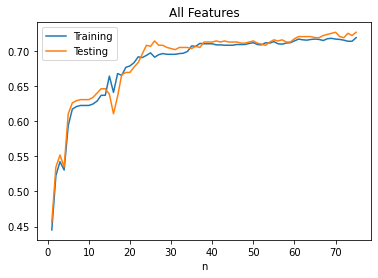

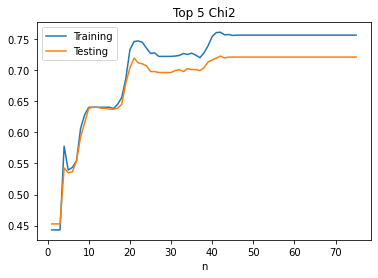

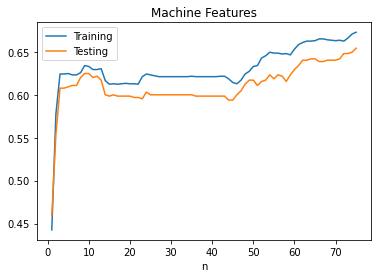

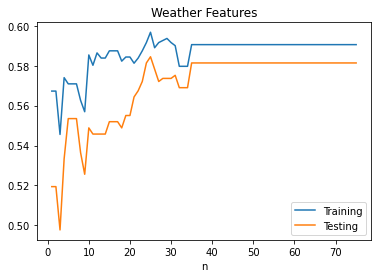

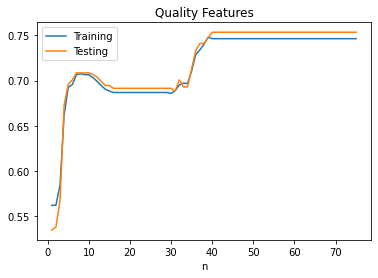

In [167]:
# loop through feature sets and get classification report and learning curves

logistic_accuracy = []

for s in feature_sets:
    
    # set x & y variables
    X = s['Data']
    y=data_df[['overall_result']]
    title = s['Name']
    
    #scale data
    X_scaled = MinMaxScaler().fit_transform(X)
    
    # call logistic learning curve function
    results_df=logistic_learning_curve(X,y,75)
    
    # plot results
    results_df.plot(x='n',y=['Training','Testing'],title=s['Name'])
    
    # export learning curve
    results_df.to_csv(f'../Results/{title.replace(" ","_")}_logistic_learning_curve.csv')
    
    
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
    
    # fit at max iterations
    classifier = LogisticRegression(max_iter=75)
    classifier.fit(X_train, y_train)
    
    #get classification report
    y_true = y_test
    y_pred = classifier.predict(X_test)
    
    #print classification report
    print(f"{title}: {classification_report(y_true, y_pred)}")
    
    #log accuracy in a series
    logistic_accuracy.append(
        {'Feature Set':title, 
         'Training Accuracy':classifier.score(X_train, y_train),
         'Testing Accuracy':classifier.score(X_test, y_test),
         'Recall':recall_score(y_true,y_pred),
         'Precision':precision_score(y_true,y_pred)
        })

# Export accuracy results
logistic_accuracy_df = pd.DataFrame(logistic_accuracy)
logistic_accuracy_df.to_csv('../results/logistic_accuracy_results.csv')


# Further Feature Refinement using Mutual Info Classification

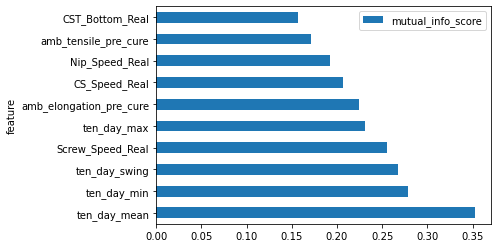

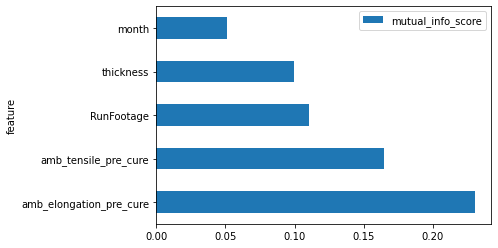

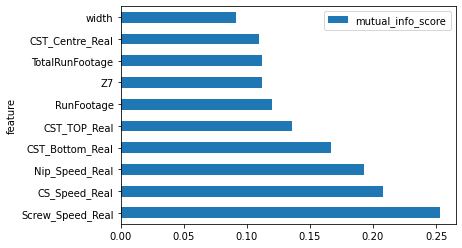

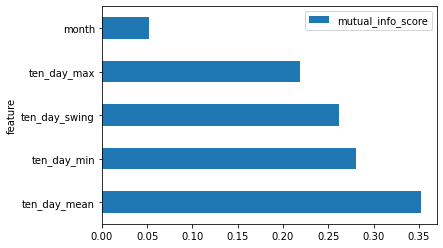

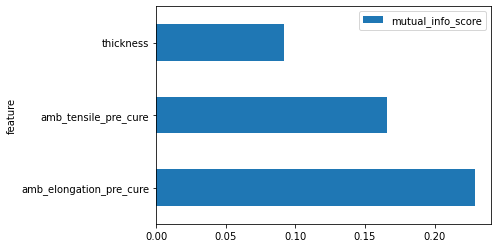

In [243]:
# get add mutual info classification to list with feature names on each feature set

for s in feature_sets:
    # set x & y variables
    X = s['Data']
    y=data_df[['overall_result']]
    title = s['Name']
    
    #create DF to hold feature classification
    features_df = pd.DataFrame(X.columns)
    features_df['mutual_info_score']=mutual_info_classif(X,y)
    features_df=features_df.rename(columns={0:'feature'})
    features_df = features_df.sort_values('mutual_info_score',ascending=False)
    
    # save mutual_info_scores
    features_df.to_csv(f'../Results/{title.replace(" ","_")}_mutual_info_scores.csv')
    
    # plot top 10 features
    features_df.head(10).plot.barh(x='feature')
    
    s['Classification']=features_df


All Features:               precision    recall  f1-score   support

           0       0.68      0.78      0.73       296
           1       0.79      0.69      0.74       349

    accuracy                           0.73       645
   macro avg       0.74      0.74      0.73       645
weighted avg       0.74      0.73      0.73       645

Top 5 Chi2:               precision    recall  f1-score   support

           0       0.73      0.75      0.74       288
           1       0.79      0.78      0.79       357

    accuracy                           0.77       645
   macro avg       0.76      0.77      0.77       645
weighted avg       0.77      0.77      0.77       645

Machine Features:               precision    recall  f1-score   support

           0       0.70      0.59      0.64       287
           1       0.71      0.80      0.75       358

    accuracy                           0.70       645
   macro avg       0.70      0.69      0.69       645
weighted avg       0.70      0

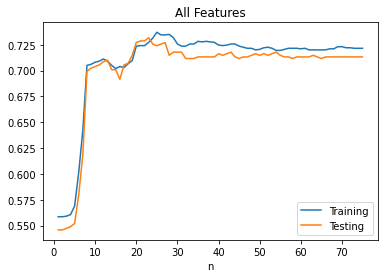

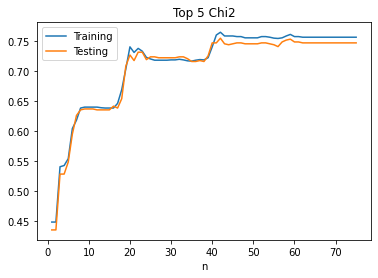

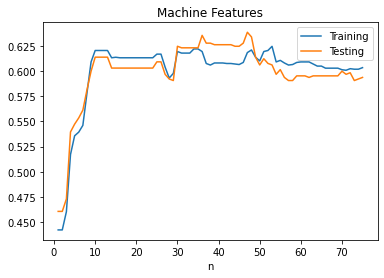

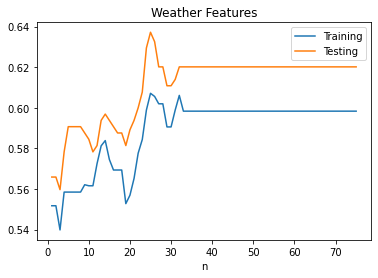

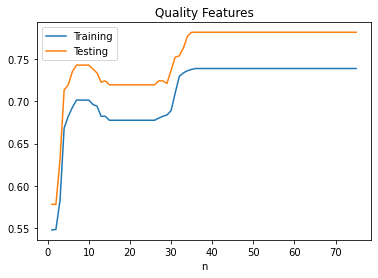

In [238]:
# loop through each data set (which now includes the feature classification) and output results using top 10 features

logistic_accuracy = []

for s in feature_sets:
    
    # set x & y variables
    X = s['Data'][s['Classification']['feature'].head(10)]
    y=data_df[['overall_result']]
    title = s['Name']
    
    #scale data
    X_scaled = MinMaxScaler().fit_transform(X)
    
    # call logistic learning curve function
    results_df=logistic_learning_curve(X,y,75)
    
    # plot results
    results_df.plot(x='n',y=['Training','Testing'],title=s['Name'])
    
    # export learning curve
    results_df.to_csv(f'../Results/{title.replace(" ","_")}_logistic_learning_curve_top10.csv')
    
    
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
    
    # fit at max iterations
    classifier = LogisticRegression(max_iter=75)
    classifier.fit(X_train, y_train)
    
    #get classification report
    y_true = y_test
    y_pred = classifier.predict(X_test)
    
    #print classification report
    print(f"{title}: {classification_report(y_true, y_pred)}")
    
    #log accuracy in a series
    logistic_accuracy.append(
        {'Feature Set':title, 
         'Training Accuracy':classifier.score(X_train, y_train),
         'Testing Accuracy':classifier.score(X_test, y_test),
         'Recall':recall_score(y_true,y_pred),
         'Precision':precision_score(y_true,y_pred),
         'Features':list(X.columns)
        })

# Export accuracy results
logistic_accuracy_df = pd.DataFrame(logistic_accuracy)
logistic_accuracy_df.to_csv('../results/logistic_accuracy_results_top10.csv')


# Gradient Boosting Classifier

In [325]:
# loop through feature sets and apply gradient boosting classifer model. Return the scores

def grad_boost_class(X, y, n_est=30, max_feat=10, max_dep=5, rate=0.1):
    
    # scale data
    X_scaled = MinMaxScaler().fit_transform(X)
    X_scaled
        
    # Split the data by using train_test_split()
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

    # Create a classifier object
    classifier = GradientBoostingClassifier(n_estimators=n_est,
                                                learning_rate=rate,
                                                max_features=max_feat,
                                                max_depth=max_dep)

    # Fit the model
    classifier.fit(X_train, y_train)
    
    #create dict with scores
    
    scores=[{'Training Accuracy':classifier.score(X_train,y_train),
            'Testing Accuracy':classifier.score(X_test,y_test),
            'Recall':recall_score(y_true,y_pred),
            'Precision':precision_score(y_true,y_pred),
            'Features':list(X.columns)}]
    
    return scores

In [324]:
def grad_boost_rates(X, y, n_est=30, max_feat=10, max_dep=5):

    # scale data
    X_scaled = MinMaxScaler().fit_transform(X)
    X_scaled

    # Split the data by using train_test_split()
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

    # Create a classifier object
    learning_rates = list(np.arange(0.01,1,0.02))
    
    # create output variable
    scores=[]
    
    for learning_rate in learning_rates:
        classifier = GradientBoostingClassifier(n_estimators=n_est,
                                                learning_rate=learning_rate,
                                                max_features=max_feat,
                                                max_depth=max_dep)
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # append to output
        scores.append({'learning_rate':learning_rate, 
                       'training_score':classifier.score(X_train,y_train),
                       'testing_score':classifier.score(X_test,y_test)})
        
    return pd.DataFrame(scores)

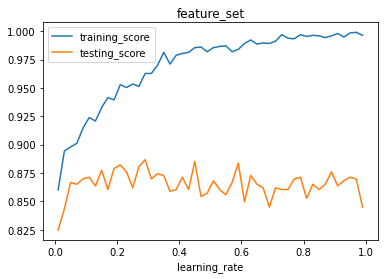

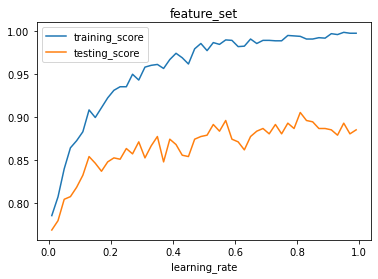

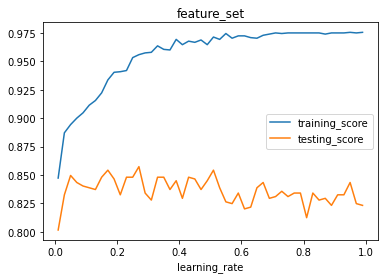

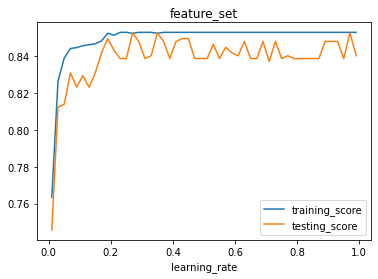

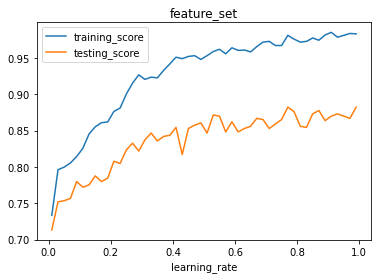

In [293]:
# loop through to identify learning rates

learning_rate_df=pd.DataFrame()

for s in feature_sets:
    
    #set max features
    if s['Data'].shape[1] < 10:
        max_features=s['Data'].shape[1]
    else:
        max_features=10
    
    #loop through learning rates
    temp_df = grad_boost_rates(X=s['Data'],y=data_df['overall_result'],max_feat=max_features)
    temp_df['feature_set']=s['Name']
    
    #print(temp_df)
    
    temp_df.plot(x='learning_rate',y=['training_score','testing_score'], title=f'{s['Name']}')
    
    learning_rate_df=learning_rate_df.append(temp_df)
    
    #print(learning_rate_df)

In [382]:
# loop through to get models using rate of 0.05 for all feature sets

# --> could investigate depth, estimators further. Probably won't though.

gbc_df=pd.DataFrame()

for s in feature_sets:
    
    #set max features
    if s['Data'].shape[1] < 10:
        max_features=s['Data'].shape[1]
    else:
        max_features=10
    
    #loop through learning rates
    temp=grad_boost_class(X=s['Data'],y=data_df['overall_result'],max_feat=max_features, rate=0.05)
    
    #print(temp)
    
    temp_df = pd.DataFrame(temp)
    temp_df['Feature Set']=s['Name']
    
    gbc_df=gbc_df.append(temp_df)
    
gbc_df = gbc_df.reset_index(drop=True)
gbc_df.head(5)

,Training Accuracy,Testing Accuracy,Recall,Precision,Features,Feature Set
0,0.886646,0.872868,0.786301,0.836735,"[RunFootage, LengthOffset, Z1, Z2, Z3, Z4, Z5,...",All Features
1,0.842133,0.804651,0.786301,0.836735,"[amb_tensile_pre_cure, thickness, RunFootage, ...",Top 5 Chi2
2,0.895445,0.852713,0.786301,0.836735,"[Machine_1, Machine_2, RunFootage, LengthOffse...",Machine Features
3,0.826605,0.803101,0.786301,0.836735,"[month, ten_day_mean, ten_day_max, ten_day_min...",Weather Features
4,0.801242,0.789147,0.786301,0.836735,"[amb_tensile_pre_cure, amb_elongation_pre_cure...",Quality Features


# Random Forest Classifier

In [528]:
def random_forest(X, y, name,n_est=500):
        
    # scale data
    X_scaled = MinMaxScaler().fit_transform(X)
    X_scaled
        
    # Split the data by using train_test_split()
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

    # Create a classifier object
    classifier = RandomForestClassifier(n_estimators=n_est)

    # Fit the model
    classifier.fit(X_train, y_train)
    
    #check out features
    features = classifier.feature_importances_
    feature_df=pd.DataFrame()
    feature_df['Feature']=X.columns
    feature_df['Importance']=features[0]
    
    # should add more classification report fields...
    scores=[{'Feature Set':name,
            'Training Accuracy':classifier.score(X_train,y_train),
            'Testing Accuracy':classifier.score(X_test,y_test),
            'Recall':recall_score(y_true,y_pred),
            'Precision':precision_score(y_true,y_pred),
            'Features':X.columns,
            'Importance':features}]
    
    # want to have it return feature importance, plus the actual results
    
    
    return scores

In [529]:
# Run random forest on all feature sets (all features)

random_forest_df=pd.DataFrame()

for s in feature_sets:
    X = s['Data']
    y = data_df['overall_result']
    temp = random_forest(X,y,name=s['Name'])
    random_forest_df = random_forest_df.append(temp)
    
random_forest_df = random_forest_df.reset_index(drop=True)
random_forest_df

,Feature Set,Training Accuracy,Testing Accuracy,Recall,Precision,Features,Importance
0,All Features,1.000000,0.877519,0.786301,0.836735,"Index(['RunFootage', 'LengthOffset', 'Z1', 'Z2...","[0.00953796325697833, 0.0021102212234875403, 0..."
1,Top 5 Chi2,1.000000,0.930233,0.786301,0.836735,"Index(['amb_tensile_pre_cure', 'thickness', 'R...","[0.3531106895466701, 0.09839590248381788, 0.05..."
2,Machine Features,0.976190,0.862016,0.786301,0.836735,"Index(['Machine_1', 'Machine_2', 'RunFootage',...","[0.0016521870359400865, 0.0012209010697437168,..."
3,Weather Features,0.857143,0.835659,0.786301,0.836735,"Index(['month', 'ten_day_mean', 'ten_day_max',...","[0.11502790857608118, 0.3011884947500543, 0.18..."
4,Quality Features,0.998965,0.900775,0.786301,0.836735,"Index(['amb_tensile_pre_cure', 'amb_elongation...","[0.38677403312172065, 0.4892076278543107, 0.12..."


In [553]:
# save results to csv
random_forest_df.drop(columns=['Features','Importance']).to_csv('../Results/random_forest_results.csv')

# loop through the models and save the feature importance
for s in feature_sets:
    
    title=s['Name']
    
    feature_df = pd.DataFrame()
    feature_df['feature']=random_forest_df['Features'].loc[random_forest_df['Feature Set']==s['Name']]
    feature_df['importance']=random_forest_df['Importance'].loc[random_forest_df['Feature Set']==s['Name']]
    
    feature_df.to_csv(f'../Resources/{title.replace(" ","_")}_random_forest_feature_selection.csv')

# Neural Network - Only on Machine Features, Quality Features

In [ ]:
# create function to input neural network

In [546]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=X.shape[1]))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [547]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [548]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train, epochs=100, verbose=0)

ValueError: in user code:

    File "C:\Users\carlt\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\carlt\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\carlt\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\carlt\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\carlt\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\carlt\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 65)


In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

21/21 - 0s - loss: 0.6370 - accuracy: 0.6620 - 74ms/epoch - 4ms/step
Loss: 0.6370446681976318, Accuracy: 0.6620154976844788


In [59]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=X.shape[1]))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train, y_train, epochs=100)


Epoch 1/100
61/61 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.5569
Epoch 2/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5533
Epoch 3/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5776
Epoch 4/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5952
Epoch 5/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.6009
Epoch 6/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.6014
Epoch 7/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.5963
Epoch 8/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6066
Epoch 9/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.5921
Epoch 10/100
61/61 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6196
Epoch 11/

61/61 [==============================] - 0s 785us/step - loss: 0.5314 - accuracy: 0.7536
Epoch 82/100
61/61 [==============================] - 0s 924us/step - loss: 0.5304 - accuracy: 0.7583
Epoch 83/100
61/61 [==============================] - 0s 949us/step - loss: 0.5308 - accuracy: 0.7536
Epoch 84/100
61/61 [==============================] - 0s 920us/step - loss: 0.5293 - accuracy: 0.7552
Epoch 85/100
61/61 [==============================] - 0s 915us/step - loss: 0.5296 - accuracy: 0.7614
Epoch 86/100
61/61 [==============================] - 0s 931us/step - loss: 0.5265 - accuracy: 0.7567
Epoch 87/100
61/61 [==============================] - 0s 895us/step - loss: 0.5279 - accuracy: 0.7572
Epoch 88/100
61/61 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7583
Epoch 89/100
61/61 [==============================] - 0s 737us/step - loss: 0.5262 - accuracy: 0.7572
Epoch 90/100
61/61 [==============================] - 0s 786us/step - loss: 0.5267 - accuracy: 0.

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

21/21 - 0s - loss: 0.5117 - accuracy: 0.7721 - 75ms/epoch - 4ms/step
Loss: 0.5116901993751526, Accuracy: 0.7720929980278015


In [61]:
print(X_train.shape[1])

35


In [62]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=X.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [67]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=1,
    overwrite=True)

In [68]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Trial 508 Complete [00h 00m 11s]
val_accuracy: 0.6651162505149841

Best val_accuracy So Far: 0.8139534592628479
Total elapsed time: 01h 50m 35s
INFO:tensorflow:Oracle triggered exit


In [69]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values


{'activation': 'relu',
 'first_units': 5,
 'num_layers': 4,
 'units_0': 9,
 'units_1': 7,
 'units_2': 5,
 'units_3': 9,
 'units_4': 9,
 'units_5': 3,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [70]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

21/21 - 0s - loss: 0.4669 - accuracy: 0.8140 - 116ms/epoch - 6ms/step
Loss: 0.46690526604652405, Accuracy: 0.8139534592628479


In [81]:
best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
best_model

In [87]:
history = best_model.fit(X_test, y_test, validation_split=0.33, epochs=1000, batch_size=10, verbose=0)

In [88]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


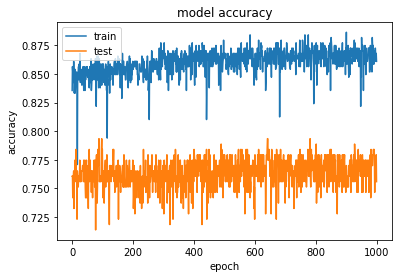

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

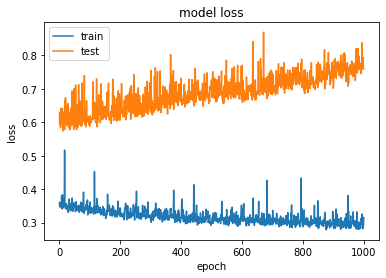

In [90]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()